In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

X_train = train.iloc[:,1:].to_numpy()
y_train = train['label'].to_numpy()



/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Check the test images

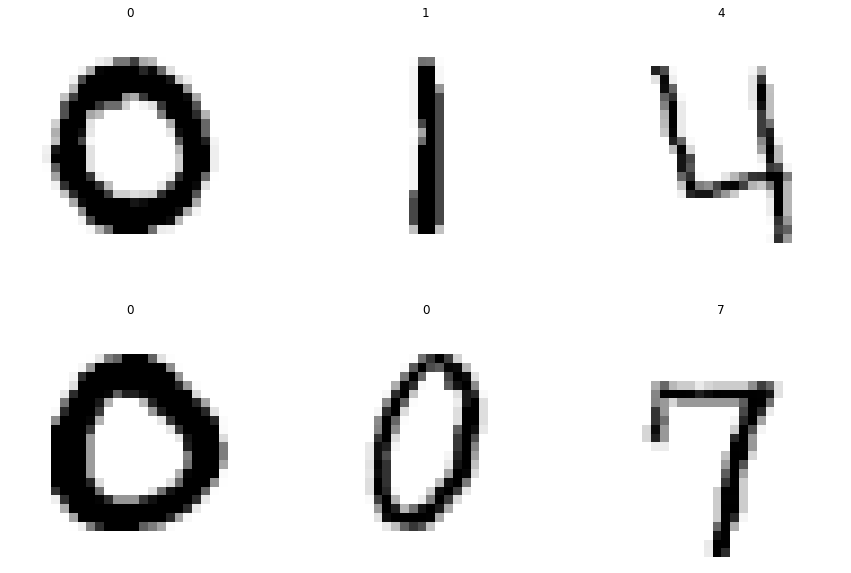

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,3,figsize=(15,10))

for i in range(2):
    for j in range(3):
        n = 3*i + j +1
        ax[i][j].imshow(X_train[n].reshape(28,28),cmap='gray_r')
        ax[i][j].set_title(y_train[n])
        ax[i][j].axis('off')

In [3]:
def one_hot(y):
    n = y.shape[0]
    en = np.zeros((n,10))
    
    for i in range(n):
        k = int(y[i])
        en[i][k] = 1
    
    return en

In [4]:
from sklearn.model_selection import train_test_split

number_of_classes = 10

X_train = (X_train / 255.0).reshape(-1,28,28,1)
y_train = one_hot(y_train)
print(y_train[0])
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(8400, 28, 28, 1) (8400, 10)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2769408   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,836,682
Trainable params: 2,836,682
Non-trainable params: 0
______________________________________________

2022-04-14 12:18:33.804980: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')

history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

2022-04-14 12:18:34.075742: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
263/263 [==============================] - 10s 36ms/step - loss: 0.3775 - accuracy: 0.8877 - val_loss: 0.1876 - val_accuracy: 0.9417
Epoch 2/10
263/263 [==============================] - 8s 31ms/step - loss: 0.1362 - accuracy: 0.9588 - val_loss: 0.1629 - val_accuracy: 0.9486
Epoch 3/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0641 - accuracy: 0.9796 - val_loss: 0.1338 - val_accuracy: 0.9590
Epoch 4/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.1804 - val_accuracy: 0.9518
Epoch 5/10
263/263 [==============================] - 9s 35ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.1802 - val_accuracy: 0.9539
Epoch 6/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.1694 - val_accuracy: 0.9605
Epoch 7/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.1688 - val_accuracy: 0.957

## Loss comparison

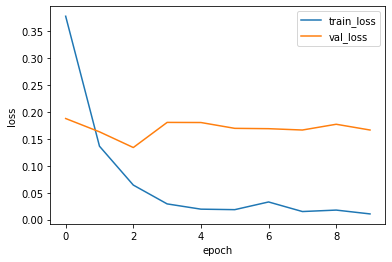

In [7]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Accuracy comparison

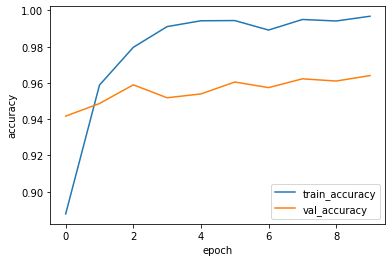

In [8]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

## Model Test & Prediction

In [9]:
X_test = test.to_numpy()
X_test = (X_test / 255.0).reshape(-1,28,28,1)


pred = model.predict(X_test)
pred

array([[8.50122139e-10, 1.89497220e-11, 1.00000000e+00, ...,
        2.35506548e-09, 6.13448070e-10, 1.15263479e-10],
       [1.00000000e+00, 1.07806602e-11, 1.44607060e-09, ...,
        6.56177424e-09, 2.84990365e-11, 9.26311181e-11],
       [1.19043330e-06, 1.19968931e-07, 1.00809411e-04, ...,
        3.87354608e-04, 1.89835730e-03, 9.97150838e-01],
       ...,
       [3.00155658e-18, 2.87058492e-15, 7.94156754e-12, ...,
        7.64355671e-15, 1.42300919e-11, 2.81969645e-14],
       [1.27850255e-08, 2.66841172e-12, 6.33099545e-11, ...,
        1.86278797e-08, 2.86575474e-08, 9.99998450e-01],
       [8.45199299e-10, 4.98268815e-10, 9.99998450e-01, ...,
        3.02259689e-10, 3.83573450e-07, 8.81141844e-08]], dtype=float32)

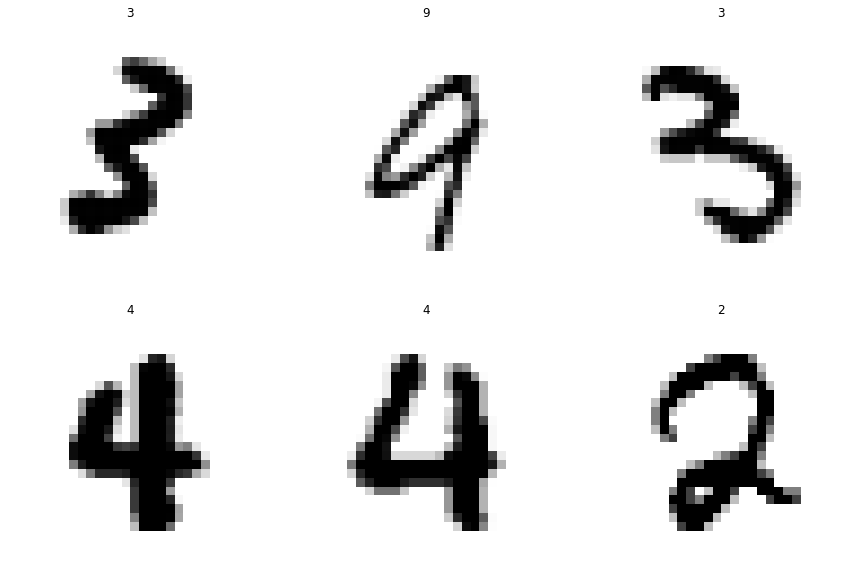

In [10]:
fig, ax = plt.subplots(2,3,figsize=(15,10))

for i in range(2):
    for j in range(3):
        n = np.random.randint(X_test.shape[0])
        ax[i][j].imshow(X_test[n].reshape(28,28),cmap='gray_r')
        ax[i][j].set_title(pred.argmax(axis=1)[n])
        ax[i][j].axis('off')